# "Optimizing Netflix Subscriber Engagement: Maximizing Revenue and Reducing Churn"


In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [107]:
# Read the CSV file
df = pd.read_csv("C://Users//vaishnavi//onedrive_backup//Desktop//Data Science EduTech//Projects/Datasets//Netflix users//Netflix Userbase.csv")

# Display the first few rows of the DataFrame to ensure it was read correctly
print(df.head(20))

    User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0         1             Basic               10  15-01-22          10-06-23   
1         2           Premium               15  05-09-21          22-06-23   
2         3          Standard               12  28-02-23          27-06-23   
3         4          Standard               12  10-07-22          26-06-23   
4         5             Basic               10  01-05-23          28-06-23   
5         6           Premium               15  18-03-22          27-06-23   
6         7          Standard               12  09-12-21          25-06-23   
7         8             Basic               10  02-04-23          24-06-23   
8         9          Standard               12  20-10-22          23-06-23   
9        10           Premium               15  07-01-23          22-06-23   
10       11             Basic               10  16-05-22          22-06-23   
11       12           Premium               15  23-03-23        

In [108]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)


User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


In [109]:
# Check for duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)


Duplicate Rows: 0


In [110]:
df.describe


<bound method NDFrame.describe of       User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0           1             Basic               10  15-01-22          10-06-23   
1           2           Premium               15  05-09-21          22-06-23   
2           3          Standard               12  28-02-23          27-06-23   
3           4          Standard               12  10-07-22          26-06-23   
4           5             Basic               10  01-05-23          28-06-23   
...       ...               ...              ...       ...               ...   
2495     2496           Premium               14  25-07-22          12-07-23   
2496     2497             Basic               15  04-08-22          14-07-23   
2497     2498          Standard               12  09-08-22          15-07-23   
2498     2499          Standard               13  12-08-22          12-07-23   
2499     2500             Basic               15  13-08-22          12-07-23   

     

In [111]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 214.8+ KB


In [131]:
users = df['User ID'].count()
print("The total number of subscribers: ",users)

The total number of subscribers:  2500


In [113]:
countries=df['Country'].unique()
print("The countires in the dataset:",countries)

The countires in the dataset: ['United States' 'Canada' 'United Kingdom' 'Australia' 'Germany' 'France'
 'Brazil' 'Mexico' 'Spain' 'Italy']


In [114]:
age = df['Age'].unique()
print("The age approxiamte is between these ages:",age)

The age approxiamte is between these ages: [28 35 42 51 33 29 46 39 37 44 31 45 48 27 38 36 30 43 32 41 26 34 49 40
 47 50]


In [115]:
print("Maximum age number:", np.max(age))
print("Minimum age number:", np.min(age))


Maximum age number: 51
Minimum age number: 26


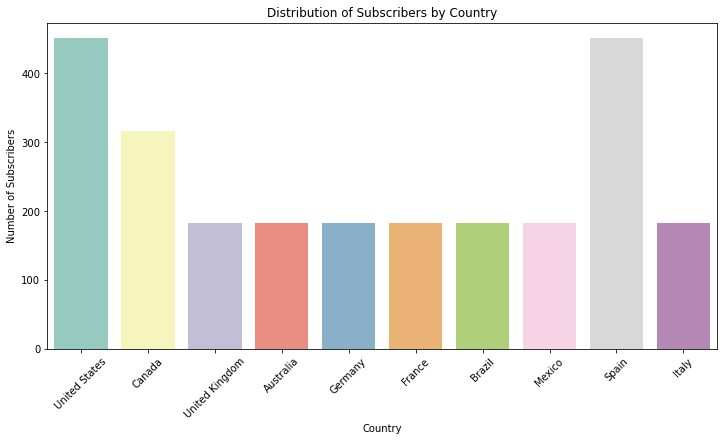

In [116]:
# Create a count plot of subscribers by country
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Country', palette='Set3')
plt.title('Distribution of Subscribers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=45)
plt.show()

In [133]:
# Filter DataFrame for United States, Canada, and Spain
us_data = df[df['Country'] == 'United States']
canada_data = df[df['Country'] == 'Canada']
spain_data = df[df['Country'] == 'Spain']

# Create separate plots for each country
plt.figure(figsize=(15, 5))

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

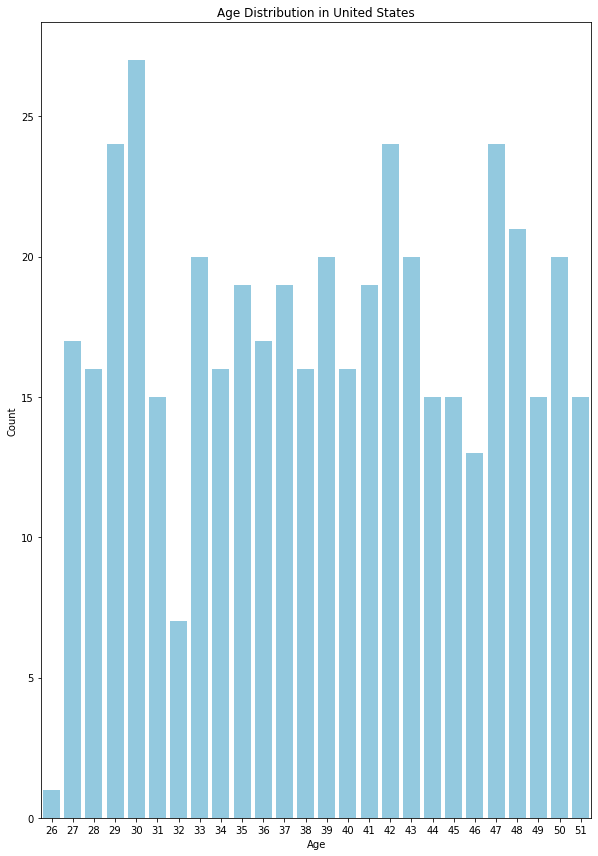

In [134]:


# Create bar plots for the count of individuals in each age group for each country
plt.figure(figsize=(24, 12))

# Plot for United States
plt.subplot(1, 3, 1)
sns.barplot(x=age_counts_us.index, y=age_counts_us.values, color='skyblue')
plt.title('Age Distribution in United States')
plt.xlabel('Age')
plt.ylabel('Count')



plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

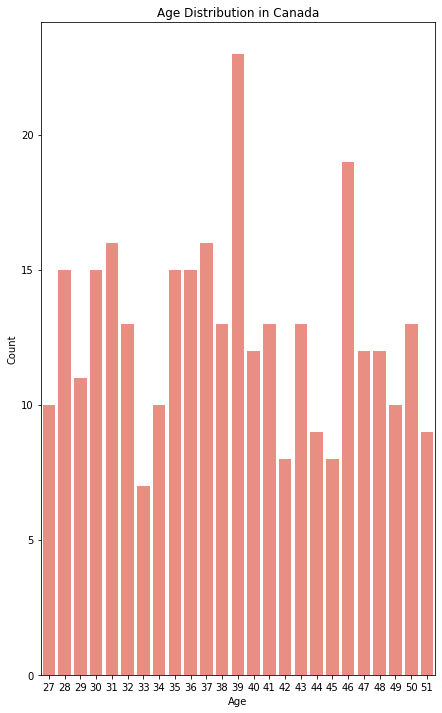

In [136]:
# Create bar plots for the count of individuals in each age group for each country
plt.figure(figsize=(24, 12))
# Plot for Canada
plt.subplot(1, 3, 2)
sns.barplot(x=age_counts_canada.index, y=age_counts_canada.values, color='salmon')
plt.title('Age Distribution in Canada')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

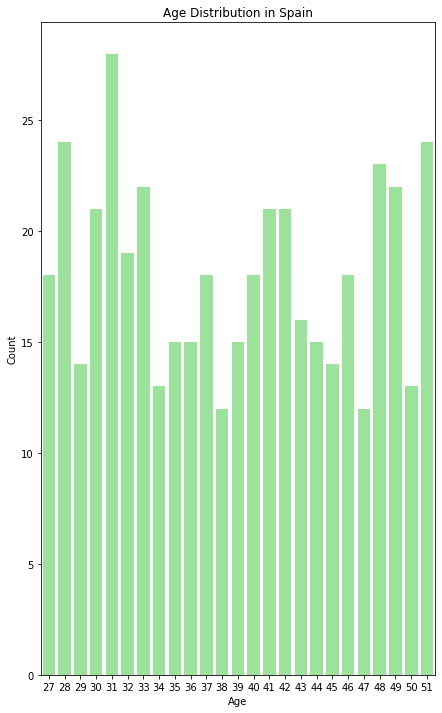

In [120]:
# Create bar plots for the count of individuals in each age group for each country
plt.figure(figsize=(24, 12))
# Plot for Spain
plt.subplot(1, 3, 3)
sns.barplot(x=age_counts_spain.index, y=age_counts_spain.values, color='lightgreen')
plt.title('Age Distribution in Spain')
plt.xlabel('Age')
plt.ylabel('Count')

In [121]:
# Define age groups
age_groups = {
    '10-20': (10, 20),
    '20-30': (20, 30),
    '30-40': (30, 40),
    '40-50': (40,50)
}

# Filter data for each country and calculate subscriber counts within each age group
max_subscribers_age_groups = {}

for country in ['United States', 'Canada', 'Spain']:
    country_data = df[df['Country'] == country]
    max_count = 0
    max_group = None
    
    for group_name, (min_age, max_age) in age_groups.items():
        group_data = country_data[(country_data['Age'] >= min_age) & (country_data['Age'] <= max_age)]
        subscriber_count = len(group_data)
        
        if subscriber_count > max_count:
            max_count = subscriber_count
            max_group = group_name
    
    max_subscribers_age_groups[country] = (max_group, max_count)

# Print the results
for country, (age_group, count) in max_subscribers_age_groups.items():
    print(f"In {country}, the age group {age_group} has the greatest number of subscribers with {count} subscribers.")


In United States, the age group 40-50 has the greatest number of subscribers with 202 subscribers.
In Canada, the age group 30-40 has the greatest number of subscribers with 155 subscribers.
In Spain, the age group 30-40 has the greatest number of subscribers with 196 subscribers.


Basic= 10$,Premium=15$ ,Standard=12$ respectively.


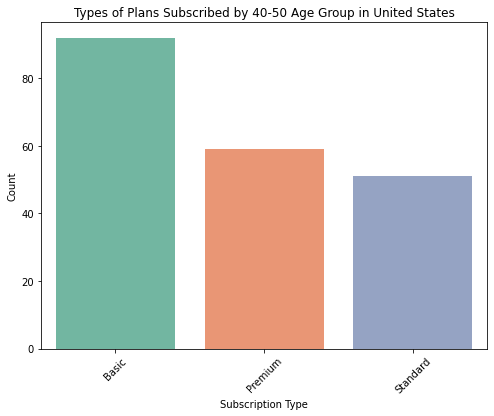

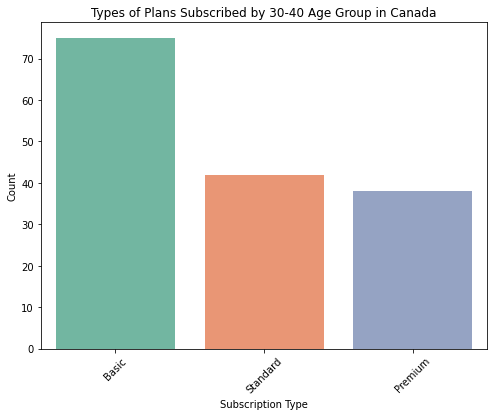

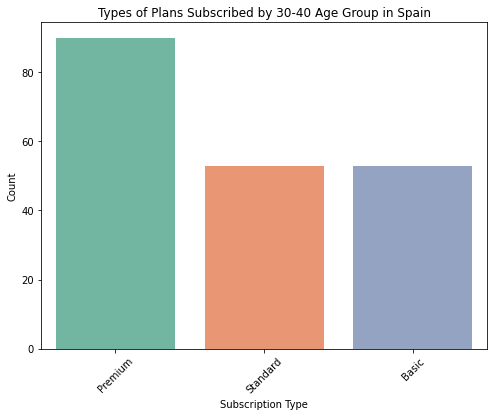

In [125]:
print("Basic= 10$,Premium=15$ ,Standard=12$ respectively.")
# Define a function to plot the plan types subscribed by the maximum subscriber age group for each country
def plot_plan_types(country, age_group):
    # Filter data for the specified country and age group
    country_data = df[df['Country'] == country]
    age_group_data = country_data[(country_data['Age'] >= age_groups[age_group][0]) & (country_data['Age'] <= age_groups[age_group][1])]
    
    # Count the occurrences of each plan type within the age group
    plan_counts = age_group_data['Subscription Type'].value_counts()
    
    # Plot the bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x=plan_counts.index, y=plan_counts.values, palette='Set2')
    plt.title(f'Types of Plans Subscribed by {age_group} Age Group in {country}')
    plt.xlabel('Subscription Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
     
# Plot the plan types subscribed by the maximum subscriber age group for each country
for country, (age_group, _) in max_subscribers_age_groups.items():
    plot_plan_types(country, age_group)
   


In [95]:
print("The Countries United States, Canada, Spain has the largest number of Subscribers, out of them, the age groups 40-50 and 30-40 are the prospective customer age groups.")

The Countries United States, Canada, Spain has the largest number of Subscribers, out of them, the age groups 40-50 and 30-40 are the prospective customer age groups.


In [96]:
print("The plan 'Basic' is the most subscribed plan.")

The plan 'Basic' is the most subscribed plan.


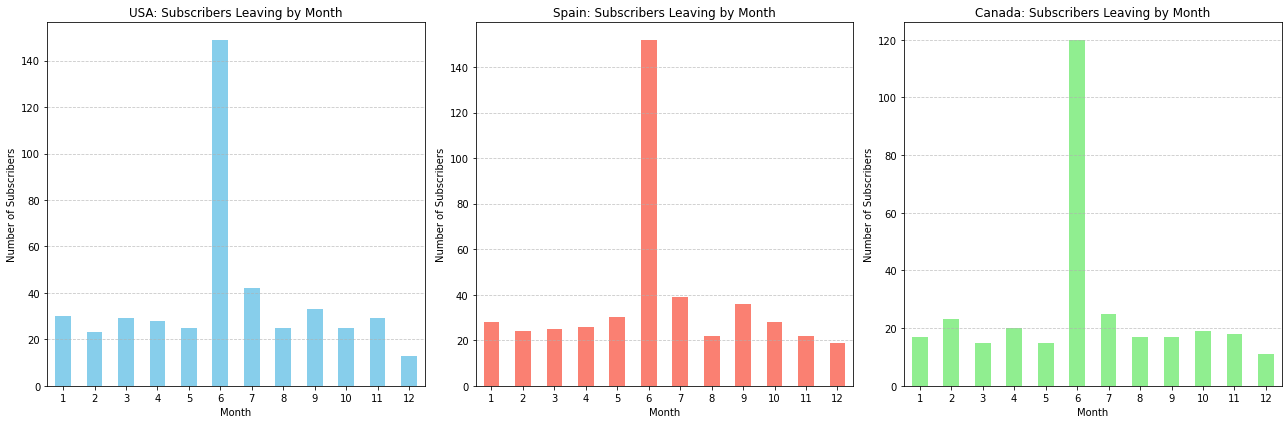

The Subscribers seem to leave the platfrom from 6th Month i.e June to 7th Month i.e July 


In [98]:


# Convert 'Last Payment Date' column to datetime
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])

# Extract month from 'Last Payment Date'
df['Leaving Month'] = df['Last Payment Date'].dt.month

# Filter data for each country
df_usa = df[df['Country'] == 'United States']
df_spain = df[df['Country'] == 'Spain']
df_canada = df[df['Country'] == 'Canada']

# Count occurrences of leaving month for each country
leaving_month_counts_usa = df_usa['Leaving Month'].value_counts().sort_index()
leaving_month_counts_spain = df_spain['Leaving Month'].value_counts().sort_index()
leaving_month_counts_canada = df_canada['Leaving Month'].value_counts().sort_index()

# Plot graphs for each country
plt.figure(figsize=(18, 6))

# Plot for USA
plt.subplot(1, 3, 1)
leaving_month_counts_usa.plot(kind='bar', color='skyblue')
plt.title('USA: Subscribers Leaving by Month')
plt.xlabel('Month')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Spain
plt.subplot(1, 3, 2)
leaving_month_counts_spain.plot(kind='bar', color='salmon')
plt.title('Spain: Subscribers Leaving by Month')
plt.xlabel('Month')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Canada
plt.subplot(1, 3, 3)
leaving_month_counts_canada.plot(kind='bar', color='lightgreen')
plt.title('Canada: Subscribers Leaving by Month')
plt.xlabel('Month')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
print("The Subscribers seem to leave the platfrom from 6th Month i.e June to 7th Month i.e July ")

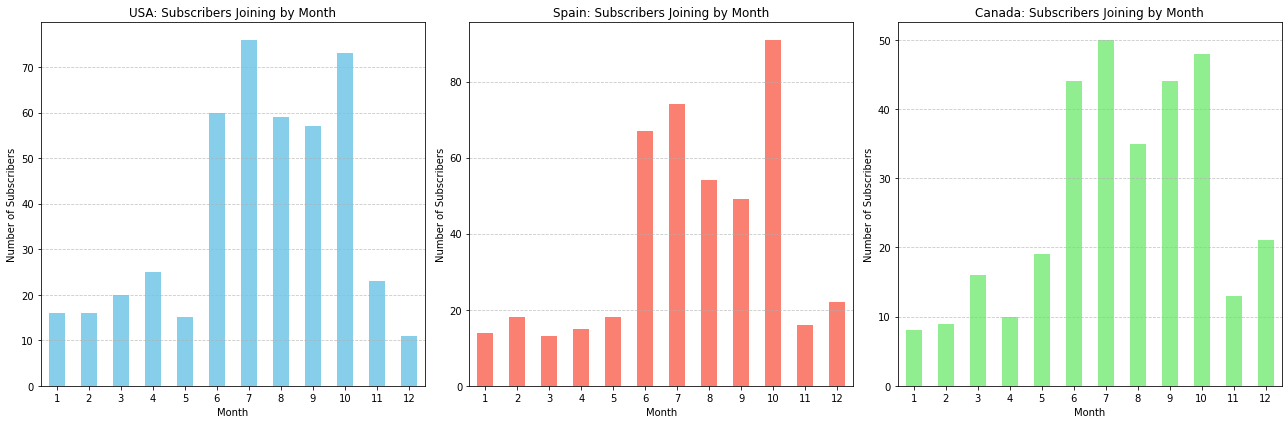

The Subscribers are seemingly joining the platform between the months 6th to 10th, July of USA, October for Spain, and July for Canada as well.


In [100]:


# Convert 'Join Date' column to datetime
df['Join Date'] = pd.to_datetime(df['Join Date'])

# Extract month from 'Join Date'
df['Joining Month'] = df['Join Date'].dt.month

# Filter data for each country
df_usa = df[df['Country'] == 'United States']
df_spain = df[df['Country'] == 'Spain']
df_canada = df[df['Country'] == 'Canada']

# Count occurrences of joining month for each country
joining_month_counts_usa = df_usa['Joining Month'].value_counts().sort_index()
joining_month_counts_spain = df_spain['Joining Month'].value_counts().sort_index()
joining_month_counts_canada = df_canada['Joining Month'].value_counts().sort_index()

# Plot graphs for each country
plt.figure(figsize=(18, 6))

# Plot for USA
plt.subplot(1, 3, 1)
joining_month_counts_usa.plot(kind='bar', color='skyblue')
plt.title('USA: Subscribers Joining by Month')
plt.xlabel('Month')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Spain
plt.subplot(1, 3, 2)
joining_month_counts_spain.plot(kind='bar', color='salmon')
plt.title('Spain: Subscribers Joining by Month')
plt.xlabel('Month')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Canada
plt.subplot(1, 3, 3)
joining_month_counts_canada.plot(kind='bar', color='lightgreen')
plt.title('Canada: Subscribers Joining by Month')
plt.xlabel('Month')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
print("The Subscribers are seemingly joining the platform between the months 6th to 10th, July of USA, October for Spain, and July for Canada as well.")

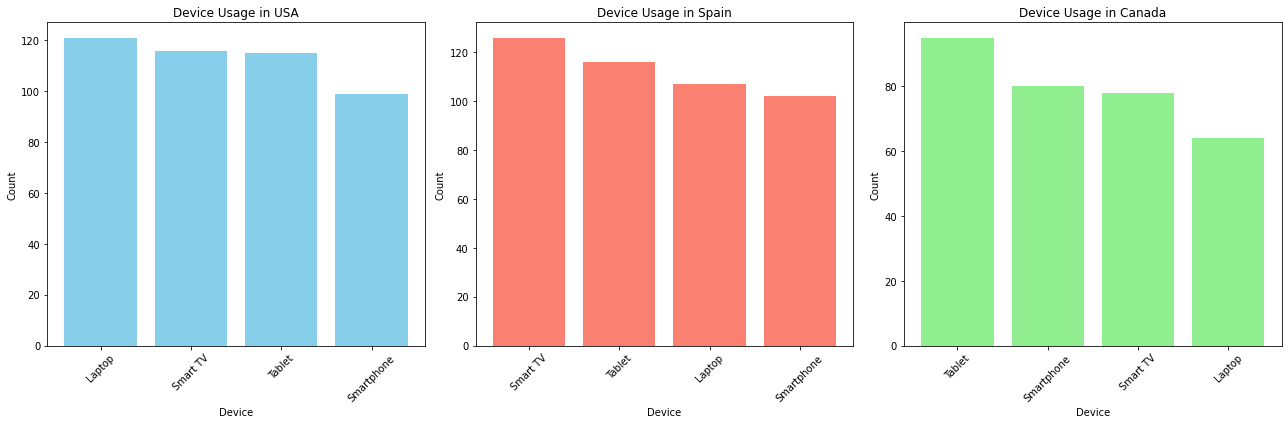

The most used device in USA is: Laptop
The most used device in Spain is: Smart TV
The most used device in Canada is: Tablet


In [129]:
# Create a figure and axis object
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for USA
axs[0].bar(device_counts_usa.index, device_counts_usa.values, color='skyblue')
axs[0].set_title('Device Usage in USA')
axs[0].set_xlabel('Device')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Plot for Spain
axs[1].bar(device_counts_spain.index, device_counts_spain.values, color='salmon')
axs[1].set_title('Device Usage in Spain')
axs[1].set_xlabel('Device')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)

# Plot for Canada
axs[2].bar(device_counts_canada.index, device_counts_canada.values, color='lightgreen')
axs[2].set_title('Device Usage in Canada')
axs[2].set_xlabel('Device')
axs[2].set_ylabel('Count')
axs[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


print(f"The most used device in USA is: Laptop")
print(f"The most used device in Spain is: Smart TV")
print(f"The most used device in Canada is: Tablet")

# Conclusion:
    
1)Countries USA, Spain, Canada are those with most subscribers. 

2)Laptop, Smart TV and Tablet are the most used devices.

3)The most subscribed plan is 'Premium'. 

4)The new subscibers mostly join the platform between the months June and October.

5)The Subscribers mostly leave the platform in the month of June.

6)In United States, the age group 40-50 has the greatest number of subscribers with 202 subscribers.

7)In Canada, the age group 30-40 has the greatest number of subscribers with 155 subscribers.

8)In Spain, the age group 30-40 has the greatest number of subscribers with 196 subscribers.